In [2]:
import jovian

In [3]:
jovian.commit(project='pandas-final-assignment2', environment=None)

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/janelle-aclarke10/pandas-final-assignment2


'https://jovian.ml/janelle-aclarke10/pandas-final-assignment2'

In [4]:
import pandas as pd

In [5]:
happy_df = pd.read_csv('2020WorldHappinessReport.csv')

In [6]:
happy_df

,CountryName,RegionalIndicator,LadderScore,SocialSupport,HealthyLifeExpectancy,FreedomToMakeLifehoices,Generosity,PerceptionsOfCorruption,GDPPerCapita
0,Finland,Western Europe,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445,1.285190
1,Denmark,Western Europe,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489,1.326949
2,Switzerland,Western Europe,7.5599,0.942847,74.102448,0.921337,0.105911,0.303728,1.390774
3,Iceland,Western Europe,7.5045,0.974670,73.000000,0.948892,0.246944,0.711710,1.326502
4,Norway,Western Europe,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218,1.424207
...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.319460,45.200001,0.640881,0.082410,0.891807,0.041072
149,Rwanda,Sub-Saharan Africa,3.3123,0.540835,61.098846,0.900589,0.055484,0.183541,0.343243
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.763093,55.617260,0.711458,-0.072064,0.810237,0.425564
151,South Sudan,Sub-Saharan Africa,2.8166,0.553707,51.000000,0.451314,0.016519,0.763417,0.289083


**Information about this Data Set**

Let's list the columns

In [7]:
happy_df.columns

Index(['CountryName', 'RegionalIndicator', 'LadderScore', 'SocialSupport',
       'HealthyLifeExpectancy', 'FreedomToMakeLifehoices', 'Generosity',
       'PerceptionsOfCorruption', ' GDPPerCapita'],
      dtype='object')

Let's find out the columns and rows

In [8]:
happy_df.shape

(153, 9)

There are 153 rows and 9 columns

Let's see the columns types and if there are any nulls in the rows

In [9]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CountryName              153 non-null    object 
 1   RegionalIndicator        153 non-null    object 
 2   LadderScore              153 non-null    float64
 3   SocialSupport            153 non-null    float64
 4   HealthyLifeExpectancy    153 non-null    float64
 5   FreedomToMakeLifehoices  153 non-null    float64
 6   Generosity               153 non-null    float64
 7   PerceptionsOfCorruption  153 non-null    float64
 8    GDPPerCapita            153 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.9+ KB


Lastly, we will see a simple analysis of the numeric data

In [10]:
happy_df.describe()

,LadderScore,SocialSupport,HealthyLifeExpectancy,FreedomToMakeLifehoices,Generosity,PerceptionsOfCorruption,GDPPerCapita
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.47324,0.808721,64.445529,0.783360,-0.014568,0.733120,0.868771
std,1.11227,0.121453,7.057848,0.117786,0.151809,0.175172,0.372416
min,2.56690,0.319460,45.200001,0.396573,-0.300907,0.109784,0.000000
25%,4.72410,0.737217,58.961712,0.714839,-0.127015,0.683019,0.575862
50%,5.51500,0.829204,66.305145,0.799805,-0.033665,0.783122,0.918549
75%,6.22850,0.906747,69.289192,0.877709,0.085429,0.849151,1.169229
max,7.80870,0.974670,76.804581,0.974998,0.560664,0.935585,1.536676


**Data Analysis**

How countries participated in the Survey?

In [11]:
happy_df.shape[0]

153

What are the regions of the countries and how many countries are in each region?

In [12]:
Regions = happy_df['RegionalIndicator'].value_counts()

In [13]:
print(Regions)

Sub-Saharan Africa                    39
Western Europe                        21
Latin America and Caribbean           21
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: RegionalIndicator, dtype: int64


What is the average Happiness Score in the world?
(We have to import Numpy to compute calculations)



In [14]:
import numpy as np

In [15]:
AvgHappiness = np.average(happy_df['LadderScore']) 
print(AvgHappiness)

5.473239862849674


**How many countries are above the happiness average?

In [16]:
HappyCountries = happy_df.LadderScore > AvgHappiness

In [17]:
happy_df[HappyCountries]

,CountryName,RegionalIndicator,LadderScore,SocialSupport,HealthyLifeExpectancy,FreedomToMakeLifehoices,Generosity,PerceptionsOfCorruption,GDPPerCapita
0,Finland,Western Europe,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445,1.285190
1,Denmark,Western Europe,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489,1.326949
2,Switzerland,Western Europe,7.5599,0.942847,74.102448,0.921337,0.105911,0.303728,1.390774
3,Iceland,Western Europe,7.5045,0.974670,73.000000,0.948892,0.246944,0.711710,1.326502
4,Norway,Western Europe,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218,1.424207
...,...,...,...,...,...,...,...,...,...
75,North Cyprus,Western Europe,5.5355,0.820357,73.702225,0.795294,0.000227,0.626116,1.212799
76,Greece,Western Europe,5.5150,0.814380,72.405258,0.541345,-0.300907,0.859931,1.128070
77,Hong Kong S.A.R. of China,East Asia,5.5104,0.845969,76.771706,0.779834,0.134980,0.420607,1.376746
78,Croatia,Central and Eastern Europe,5.5047,0.874624,70.214905,0.714839,-0.128538,0.916495,1.109024


**Exploratory Analysis and Visualization**

In [18]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

How does Happiness relate to Corruption?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


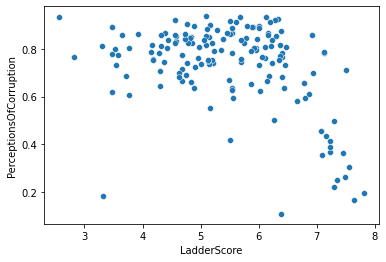

In [19]:
sns.scatterplot(happy_df.LadderScore, happy_df.PerceptionsOfCorruption)

Based on this graph, it looks like most countries have a high perception of corruption and have a level of happiness.

What are the top five happiest countries?

In [20]:
df_tophappy = happy_df.loc[happy_df.LadderScore >= 6].sort_values(by ="LadderScore", ascending = False).head(5)

In [21]:
df_tophappy

,CountryName,RegionalIndicator,LadderScore,SocialSupport,HealthyLifeExpectancy,FreedomToMakeLifehoices,Generosity,PerceptionsOfCorruption,GDPPerCapita
0,Finland,Western Europe,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445,1.285190
1,Denmark,Western Europe,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489,1.326949
2,Switzerland,Western Europe,7.5599,0.942847,74.102448,0.921337,0.105911,0.303728,1.390774
3,Iceland,Western Europe,7.5045,0.974670,73.000000,0.948892,0.246944,0.711710,1.326502
4,Norway,Western Europe,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218,1.424207


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Ladder Score')

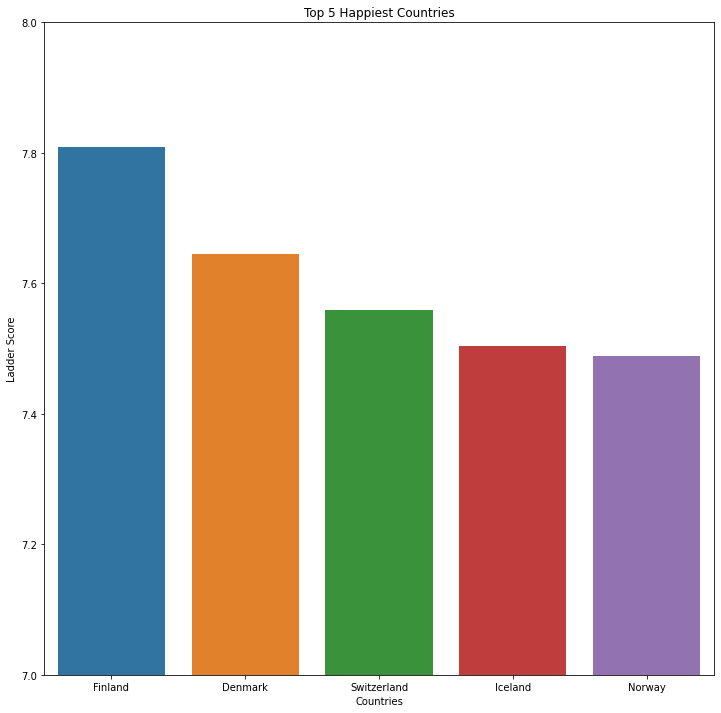

In [22]:
plt.figure(figsize=(12, 12))
sns.barplot(df_tophappy.CountryName, df_tophappy.LadderScore)
plt.ylim(7, 8)
plt.title("Top 5 Happiest Countries");
plt.xlabel('Countries');
plt.ylabel('Ladder Score')

What 5 countries have the lowest life expectancy?

In [23]:
df_shortlife = happy_df.loc[happy_df.HealthyLifeExpectancy <= 60].sort_values(by ="HealthyLifeExpectancy", ascending = True).head(5)

In [24]:
df_shortlife

,CountryName,RegionalIndicator,LadderScore,SocialSupport,HealthyLifeExpectancy,FreedomToMakeLifehoices,Generosity,PerceptionsOfCorruption,GDPPerCapita
148,Central African Republic,Sub-Saharan Africa,3.4759,0.319460,45.200001,0.640881,0.082410,0.891807,0.041072
142,Lesotho,Sub-Saharan Africa,3.6528,0.780496,48.003624,0.738126,-0.145732,0.857392,0.454939
126,Chad,Sub-Saharan Africa,4.4227,0.632388,48.220539,0.587305,0.017835,0.802761,0.302287
84,Ivory Coast,Sub-Saharan Africa,5.2333,0.658049,49.503773,0.727909,-0.043991,0.790772,0.537094
114,Nigeria,Sub-Saharan Africa,4.7241,0.737217,49.861908,0.759578,0.033746,0.861874,0.645902


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Healthy Life Expectancy')

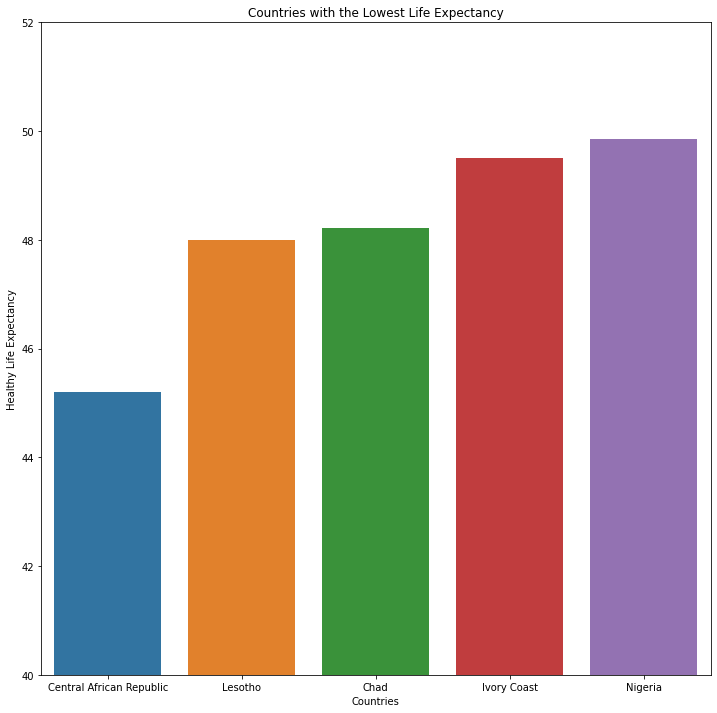

In [25]:
plt.figure(figsize=(12, 12))
sns.barplot(df_shortlife.CountryName, df_shortlife.HealthyLifeExpectancy)
plt.ylim(40, 52)
plt.title("Countries with the Lowest Life Expectancy");
plt.xlabel('Countries');
plt.ylabel('Healthy Life Expectancy')

What is the age distribution for the highest life expectancy?

In [26]:
Higheslife = happy_df.HealthyLifeExpectancy.astype(int)


In [27]:
Higheslife

0      71
1      72
2      74
3      73
4      73
       ..
148    45
149    61
150    55
151    51
152    52
Name: HealthyLifeExpectancy, Length: 153, dtype: int64

In [28]:
happy_df['HighestAge'] = Higheslife
happy_df

,CountryName,RegionalIndicator,LadderScore,SocialSupport,HealthyLifeExpectancy,FreedomToMakeLifehoices,Generosity,PerceptionsOfCorruption,GDPPerCapita,HighestAge
0,Finland,Western Europe,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445,1.285190,71
1,Denmark,Western Europe,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489,1.326949,72
2,Switzerland,Western Europe,7.5599,0.942847,74.102448,0.921337,0.105911,0.303728,1.390774,74
3,Iceland,Western Europe,7.5045,0.974670,73.000000,0.948892,0.246944,0.711710,1.326502,73
4,Norway,Western Europe,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218,1.424207,73
...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.319460,45.200001,0.640881,0.082410,0.891807,0.041072,45
149,Rwanda,Sub-Saharan Africa,3.3123,0.540835,61.098846,0.900589,0.055484,0.183541,0.343243,61
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.763093,55.617260,0.711458,-0.072064,0.810237,0.425564,55
151,South Sudan,Sub-Saharan Africa,2.8166,0.553707,51.000000,0.451314,0.016519,0.763417,0.289083,51


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Life Expectancy')

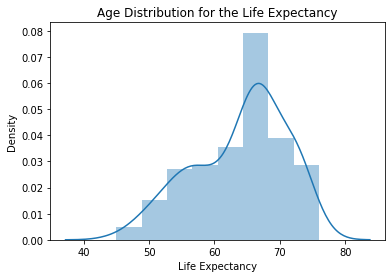

In [36]:
plt.title('Age Distribution for the Life Expectancy')
sns.distplot(happy_df.HighestAge);
plt.xlabel('Life Expectancy')


In [42]:
Ages_Count = happy_df['HighestAge'].value_counts()
Ages_Count

67    15
66    14
73    12
72    11
68    11
64     8
65     7
69     6
57     6
55     5
58     5
62     5
59     4
54     4
56     4
61     4
63     4
51     3
52     3
70     3
71     3
53     3
49     2
48     2
76     2
60     2
74     2
50     1
75     1
45     1
Name: HighestAge, dtype: int64

Based on the results, the age with the highest life expectancy is **67**.

How does Corruption relate to the genorosity of a country?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


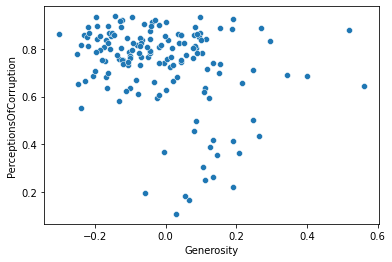

In [43]:
sns.scatterplot(happy_df.Generosity, happy_df.PerceptionsOfCorruption)

This chart shows that the lower the generosity the higher the corruption. It also shows a country can be very generous and still have a high level of corruption.

The conclusion is that most of the happiest countries are in Europe and the most corupt countries and the countries with the lowest life expectency are in Africa. The age with the longest life expectation is 67. Generosity and Corruption  do not relate to each other.

In [45]:
import jovian

In [46]:
import jovian

[jovian] Detected Colab notebook...


[jovian] Error: Please provide the project argument e.g. jovian.commit(project='my-project')
